In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('/content/movies_metadata.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [20]:
c=df['vote_average'].mean()
c

5.639244247413694

In [21]:
m=df['vote_count'].quantile(0.9)
m

174.0

In [22]:
qm=df[(df['runtime']>150)&(df['revenue']>300000000)&(df['homepage'].notna())]

In [23]:
qm=qm[qm['vote_count']>=m]

In [24]:
qm.shape

(27, 24)

In [25]:
def wr(x,m=m,c=c):
    v=x['vote_count']
    r=x['vote_average']
    return (v/(v+m)*r)+(m/(m+v)*c)

In [26]:
qm['score']=qm.apply(wr,axis=1)

In [27]:
qm=qm.sort_values('score',ascending=False)

In [28]:
qm[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.262793
522,Schindler's List,4436.0,8.3,8.199572
22879,Interstellar,11187.0,8.1,8.062312
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.049027
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.954691
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.947438
22131,The Wolf of Wall Street,6768.0,7.9,7.843335
13605,Inglourious Basterds,6598.0,7.9,7.841912
20051,Django Unchained,10297.0,7.8,7.764094
18252,The Dark Knight Rises,9263.0,7.6,7.563847


Text(0.5, 1.0, 'MOst voted Movies')

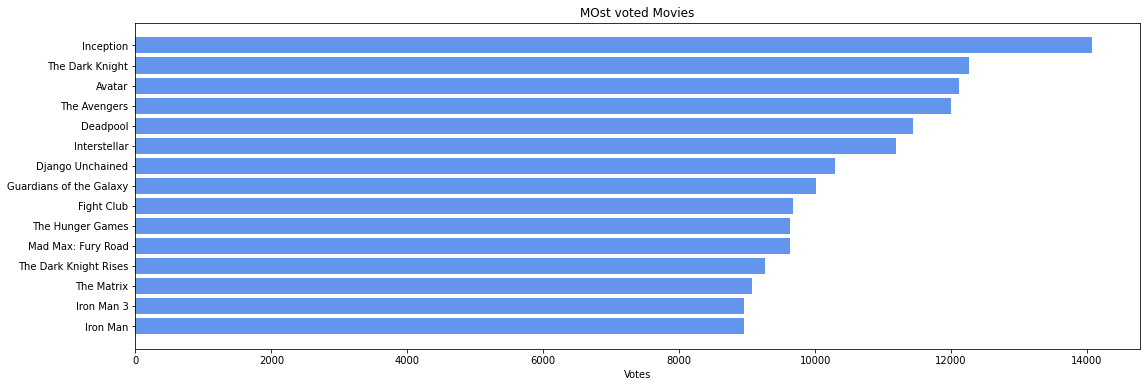

In [29]:
d=df.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))

plt.barh(d['title'].head(15),d['vote_count'].head(15),align='center',color='cornflowerblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("MOst voted Movies")